In [1]:
#importing necessary libraries
import pandas as pd # for managing the data
import numpy as np # for mathematical operations
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#loading the dataset and checking top 5
df = pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
#checking columns name
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
# checking number of rows and columns
df.shape

(1310, 14)

In [5]:
#checking last row
df.tail(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop rows where PassengerClass is missing: Since PassengerClass uniquely identifies each passenger, the row was removed to maintain dataset integrity.
df = df[df['pclass'].notna()]

In [7]:
df.shape

(1309, 14)

## Inspect the Dataset
Data inspection involves checking the structure, data types, and missing values in the dataset.
It is very useful in understanding data quality issues before cleaning and identifying what needs fixing

In [9]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


##### From the results above, 
it can be seen that some columns have missing values as not all columns has 1309 entries,
also, some columns has incorrect data type e.g age.

# Data Cleaning
Picking the column one after the other

### pclass column
Passenger class: First Class, Second Class, Third Class

In [13]:
#Convert to readable labels and chaning the data type
df["pclass"] = df["pclass"].map({
    1: "First Class",
    2: "Second Class",
    3: "Third Class"
}).astype("category")

In [14]:
# Rename to Passenger_Class
df.rename(columns={"pclass": "Passenger_Class"}, inplace=True)

In [15]:
# Make it ordered
df["Passenger_Class"] = pd.Categorical(
    df["Passenger_Class"],
    categories=["First Class", "Second Class", "Third Class"],
    ordered=True
)

### survived column
Survival of the passenger (Yes = survived, No = did not survive)

In [17]:
# Rename the Column
df.rename(columns={"survived": "Survival_Status"}, inplace=True)

In [18]:
# Convert 0 and 1 to Yes / No
df["Survival_Status"] = df["Survival_Status"].map({
    1: "Yes",
    0: "No"
})

In [19]:
# Convert to Categorical 
df["Survival_Status"] = df["Survival_Status"].astype("category") 

#Ordered Category
df["Survival_Status"] = pd.Categorical(
    df["Survival_Status"],
    categories=["No", "Yes"],
    ordered=True
)

### name column
Full name of the passenger, including title, first name, and last name

In [21]:
# Remove leading/trailing spaces
df['name'] = df['name'].str.strip()

# Split by comma to get Last Name and rest
df[['Last_Name', 'Rest']] = df['name'].str.split(',', expand=True)

# Remove whitespace in rest
df['Rest'] = df['Rest'].str.strip()

# Extract Title (before period)
df['Title'] = df['Rest'].str.extract(r'([A-Za-z]+)\.')

# Extract first name (after title)
df['First_Name'] = df['Rest'].str.replace(r'^.*?\.\s*', '', regex=True).str.replace(r'\(.*\)', '', regex=True).str.strip()

# Combine into Passenger_Name: Title + First + Last
df['Passenger_Name'] = df['Title'] + " " + df['First_Name'] + " " + df['Last_Name']

### sex column
Gender of the passenger (Male / Female)

In [23]:
# Rename the Column
df.rename(columns={"sex": "Gender"}, inplace=True)

In [24]:
# Standardize Values and convert to category data type
df["Gender"] = df["Gender"].map({
    "male": "Male",
    "female": "Female"
}).astype("category")

### age column
Age of the passenger in years

In [26]:
# Rename the column
df.rename(columns={"age": "Age"}, inplace=True)

In [27]:
# Check Missing Values
missing_age = df['Age'].isnull().sum()
total_rows = len(df)
percentage_missing_age = (missing_age / total_rows) * 100

print(f"Missing Age Values: {missing_age}")
print(f"Percentage Missing: {percentage_missing_age:.2f}%")

Missing Age Values: 263
Percentage Missing: 20.09%


In [28]:
# From thevresults above, we impute the missing values since it is less than 70%
# Calculate Mean and Median
mean_age = df['Age'].mean()
median_age = df['Age'].median()

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")

Mean Age: 29.88
Median Age: 28.00


In [29]:
# Replace Missing Values with Median since this is not a normal distribution i.e mean is not equal to median
df['Age'] = df['Age'].fillna(median_age)

In [30]:
# Convert Decimals to Whole Numbers
df['Age'] = df['Age'].round(0)
# Convert to Integer Type
df['Age'] = df['Age'].astype("Int64")

### sibsp column
Number of siblings/spouses aboard

In [32]:
# Rename the column
df.rename(columns={"sibsp": "Siblings_Spouse"}, inplace=True)

In [33]:
# Convert to Integer
df["Siblings_Spouse"] = df["Siblings_Spouse"].astype('Int64')

### parch column
Number of parents/children aboard

In [35]:
# Rename the Column
df.rename(columns={"parch": "Parent_Children"}, inplace=True)

In [36]:
# Convert to Integer
df["Parent_Children"] = df["Parent_Children"].astype("Int64")

### ticket column
Ticket number of the passenger (alphanumeric)

In [38]:
# Drop the unwanted column ticket as it has no effect on survival rate
df.drop(columns=["ticket"], inplace=True)

### fare column
Ticket fare paid by the passenger

In [40]:
# Rename the Column
df.rename(columns={"fare": "Fare"}, inplace=True)

In [41]:
# Check Missing Values
missing_fare = df['Fare'].isnull().sum()
total_rows = len(df)

percentage_missing_fare = (missing_fare / total_rows) * 100

print(f"Missing Fare values: {missing_fare}")
print(f"Percentage Missing: {percentage_missing_fare:.2f}%")

Missing Fare values: 1
Percentage Missing: 0.08%


In [42]:
# there is 1 missing row
# Calculate Mean and Median

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

print(f"Mean Fare: {mean_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")


Mean Fare: 33.30
Median Fare: 14.45


In [43]:
# Replace Missing Value with Median since mean is not equal to median
df['Fare'] = df['Fare'].fillna(median_fare)

In [44]:
# Round and Convert Type
df['Fare'] = df['Fare'].round(0).astype("Int64")

### cabin column
Cabin number (may include letter and number, many missing)

In [46]:
# Check Missing Values
missing_cabin = df['cabin'].isnull().sum()
total_rows = len(df)
percentage_missing_cabin = (missing_cabin / total_rows) * 100

print(f"Missing cabin values: {missing_cabin}")
print(f"Percentage Missing: {percentage_missing_cabin:.2f}%")

Missing cabin values: 1014
Percentage Missing: 77.46%


#### From the result above
Cabin has about 77% missing values, too many to impute reliably.
Imputing 77% of values could introduce bias.
Keeping it would make analysis messy and could mislead survival insights.

Although, impact of cabin on Survival Rate Analysis
Cabin may be related to survival (upper decks vs lower decks).
But with so many missing values, the signal is weak, and analysis would be unreliable.
Better to drop it for this project.

In [48]:
df.drop(columns=["cabin"], inplace=True)

### embarked column
Port of embarkation (Southampton, Cherbourg, Queenstown)

In [50]:
# Rename the Column
df.rename(columns={"embarked": "Embarked"}, inplace=True)

In [51]:
# Check Missing Values
missing_embarked = df['Embarked'].isnull().sum()
total_rows = len(df)

percentage_missing_embarked = (missing_embarked / total_rows) * 100

print(f"Missing Embarked values: {missing_embarked}")
print(f"Percentage Missing: {percentage_missing_embarked:.2f}%")

Missing Embarked values: 2
Percentage Missing: 0.15%


In [52]:
# Calculate Mode
#Since this is categorical, the mode is the most frequent value:
mode_embarked = df['Embarked'].mode()[0]
print(f"Mode of Embarked: {mode_embarked}")

# Fill Missing Values with Mode
df['Embarked'] = df['Embarked'].fillna(mode_embarked)


Mode of Embarked: S


In [53]:
# Replace Codes with Full Names
df['Embarked'] = df['Embarked'].map({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})

# Convert to Categorical
df['Embarked'] = df['Embarked'].astype('category')

### boat column
Lifeboat number / access (many missing; indicates which boat they boarded)

In [55]:
# Rename column
df.rename(columns={"boat": "Boat (Access)"}, inplace=True)

In [56]:
# Create binary categorical: Has Access / No Access
df['Boat (Access)'] = df['Boat (Access)'].apply(lambda x: 'Has Access' if pd.notnull(x) else 'No Access')

# Convert to category
df['Boat (Access)'] = df['Boat (Access)'].astype('category')

### body column
Body identification number (numeric; indicates recovered body)

In [58]:
# Rename Column
df.rename(columns={"body": "Body"}, inplace=True)  
# Convert Column to Integer
df['Body'] = df['Body'].astype('Int64')  # Use pandas nullable integer type

In [59]:
# Check Missing Values
missing_Body = df['Body'].isnull().sum()
total_rows = len(df)

percentage_missing_body = (missing_Body / total_rows) * 100

print(f"Missing Body values: {missing_Body}")
print(f"Percentage Missing: {percentage_missing_body:.2f}%")

Missing Body values: 1188
Percentage Missing: 90.76%


** The Body column contained over 70% missing values. Since blank entries occurred only for passengers who survived, 
a new binary column named Body_Recovered was created (1 = body recovered, 0 = not recovered). 
The original Body column was then dropped as the body identification numbers had no analytical relevance. **

In [61]:
df['Body_Recovered'] = df['Body'].notna().astype(int)
#dropping Body column
df.drop(columns=["Body"], inplace=True)

### home.dest column
Home / destination of the passenger (city / country, may be missing)

In [63]:
# Rename Column 
df.rename(columns={"home.dest": "Home_Destination"}, inplace=True)
# Dropping the unwanted Column
df.drop(columns=["Home_Destination"], inplace=True)

In [64]:
#checking columns
df.columns

Index(['Passenger_Class', 'Survival_Status', 'name', 'Gender', 'Age',
       'Siblings_Spouse', 'Parent_Children', 'Fare', 'Embarked',
       'Boat (Access)', 'Last_Name', 'Rest', 'Title', 'First_Name',
       'Passenger_Name', 'Body_Recovered'],
      dtype='object')

In [65]:
#dropping unnecessary columns
df.drop(columns=["name", "Last_Name", "Rest", "Title", "First_Name"], inplace=True)

In [66]:
#checking the information again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Passenger_Class  1309 non-null   category
 1   Survival_Status  1309 non-null   category
 2   Gender           1309 non-null   category
 3   Age              1309 non-null   Int64   
 4   Siblings_Spouse  1309 non-null   Int64   
 5   Parent_Children  1309 non-null   Int64   
 6   Fare             1309 non-null   Int64   
 7   Embarked         1309 non-null   category
 8   Boat (Access)    1309 non-null   category
 9   Passenger_Name   1309 non-null   object  
 10  Body_Recovered   1309 non-null   int32   
dtypes: Int64(4), category(5), int32(1), object(1)
memory usage: 78.6+ KB


In [67]:
# checking the missing columns again
#Detecting only missing columns
#In complete data could break analysis if not handled
df.isna().sum()[df.isna().sum() > 0]


Series([], dtype: int64)

In [68]:
# Save as CSV
df.to_csv("Titanic_Cleaned.csv", index=False)

In [69]:
cleaned_df = pd.read_csv("Titanic_Cleaned.csv")

In [70]:
cleaned_df.columns

Index(['Passenger_Class', 'Survival_Status', 'Gender', 'Age',
       'Siblings_Spouse', 'Parent_Children', 'Fare', 'Embarked',
       'Boat (Access)', 'Passenger_Name', 'Body_Recovered'],
      dtype='object')

In [71]:
cleaned_df.head()

,Passenger_Class,Survival_Status,Gender,Age,Siblings_Spouse,Parent_Children,Fare,Embarked,Boat (Access),Passenger_Name,Body_Recovered
0,First Class,Yes,Female,29,0,0,211,Southampton,Has Access,Miss Elisabeth Walton Allen,0
1,First Class,Yes,Male,1,1,2,152,Southampton,Has Access,Master Hudson Trevor Allison,0
2,First Class,No,Female,2,1,2,152,Southampton,No Access,Miss Helen Loraine Allison,0
3,First Class,No,Male,30,1,2,152,Southampton,No Access,Mr Hudson Joshua Creighton Allison,1
4,First Class,No,Female,25,1,2,152,Southampton,No Access,Mrs Hudson J C Allison,0


In [72]:
bins = [0, 12, 19, 39, 59, 120]
labels = ['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior']
cleaned_df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

Survival_Status        No       Yes
Age_Group                          
Child            0.428571  0.571429
Teen             0.603053  0.396947
Adult            0.644815  0.355185
Middle_Aged      0.590244  0.409756
Senior           0.700000  0.300000


C:\Users\HP\AppData\Local\Temp\ipykernel_19196\314405079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = cleaned_df.groupby('Age_Group')['Survival_Status'].value_counts(normalize=True).unstack()


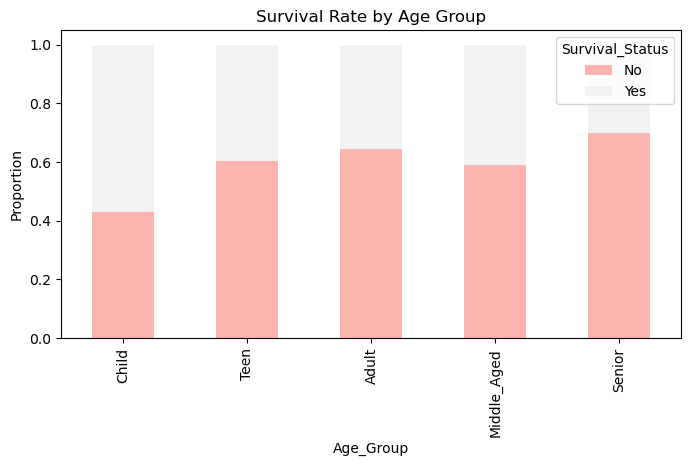

In [73]:
age_survival = cleaned_df.groupby('Age_Group')['Survival_Status'].value_counts(normalize=True).unstack()
print(age_survival)
age_survival.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Pastel1')
plt.title("Survival Rate by Age Group")
plt.ylabel("Proportion")
plt.savefig("Survival Rate by Age Group.png")
plt.show()

**Age Group
Children (0–12) survived more (~57%) than adults (~36%). 
Teens and middle-aged adults had moderate survival, showing survival decreased with age.**

In [75]:
gender_survival = cleaned_df.groupby('Gender')['Survival_Status'].value_counts(normalize=True).unstack()
print(gender_survival)

Survival_Status        No       Yes
Gender                             
Female           0.272532  0.727468
Male             0.809015  0.190985


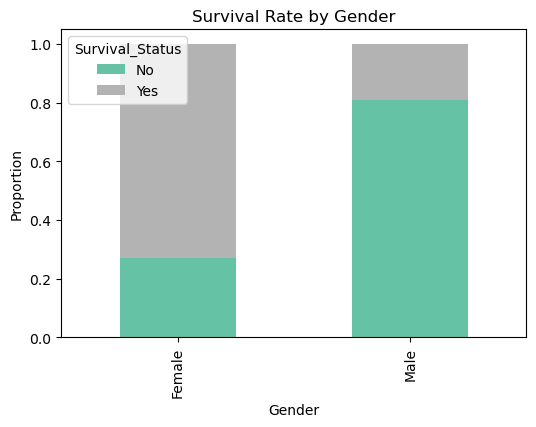

In [76]:
gender_survival.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("Survival Rate by Gender")
plt.ylabel("Proportion")
plt.savefig("Survival Rate by Gender.png")
plt.show()

**Females had a substantially higher survival rate (~73%) compared to males (~19%), 
highlighting the “women and children first” evacuation protocol.**

Survival_Status        No       Yes
Passenger_Class                    
First Class      0.380805  0.619195
Second Class     0.570397  0.429603
Third Class      0.744711  0.255289


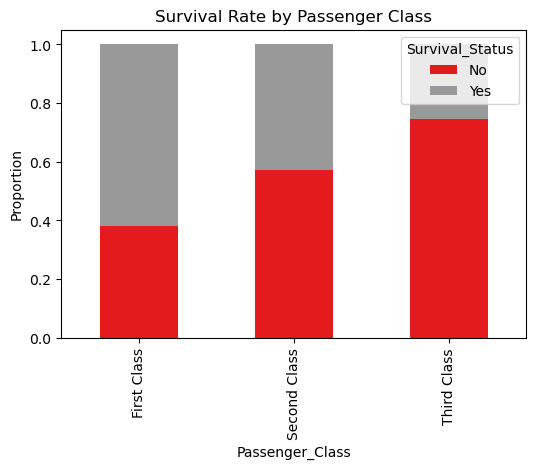

In [78]:
class_survival = cleaned_df.groupby('Passenger_Class')['Survival_Status'].value_counts(normalize=True).unstack()
class_survival.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set1')
print(class_survival)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Proportion")
plt.savefig("Survival Rate by Passenger Class.png")
plt.show()

**Passenger Class
Survival was highest for First Class (~62%) and lowest for Third Class (~26%), 
reflecting the advantage of location and resources for higher-class passengers.**

Survival_Status        No       Yes
Body_Recovered                     
0                0.579125  0.420875
1                1.000000       NaN


<Figure size 500x400 with 0 Axes>

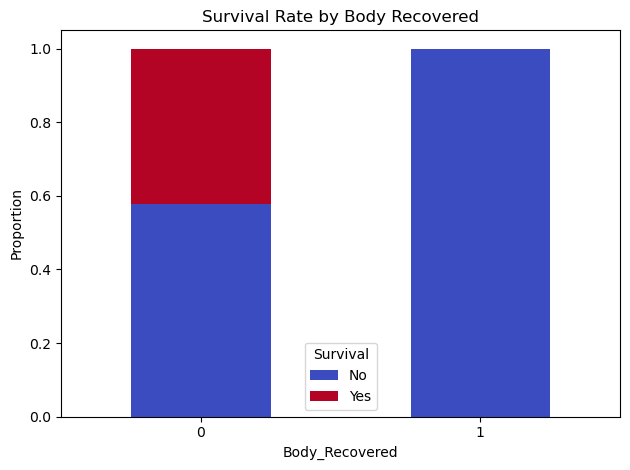

In [80]:
body_survival = cleaned_df.groupby('Body_Recovered')['Survival_Status'].value_counts(normalize=True).unstack()
print(body_survival)
plt.figure(figsize=(5,4))
body_survival.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Survival Rate by Body Recovered")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Survival")
plt.tight_layout()
plt.savefig("Survival_by_BodyRecovered.png")
plt.show()

**All passengers with a recorded body (1) did not survive, while 0 corresponds to survivors (~42% survival), 
confirming that body recovery is a strong indicator of non-survival.**

Survival_Status        No       Yes
Boat (Access)                      
Has Access       0.018519  0.981481
No Access        0.972053  0.027947


<Figure size 600x400 with 0 Axes>

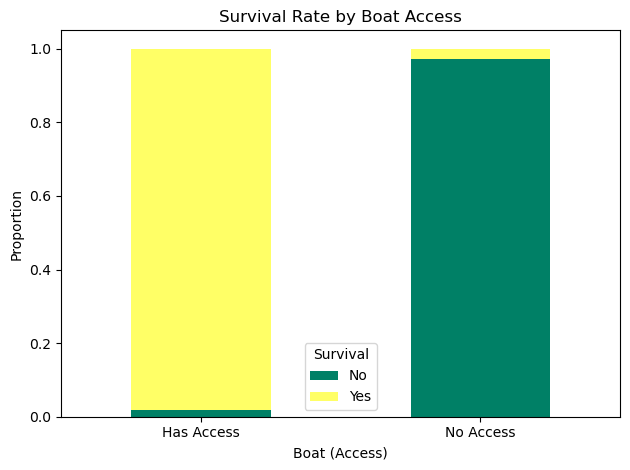

In [82]:
boat_survival = cleaned_df.groupby('Boat (Access)')['Survival_Status'].value_counts(normalize=True).unstack()
print(boat_survival)
plt.figure(figsize=(6,4))
boat_survival.plot(kind='bar', stacked=True, colormap='summer')
plt.title("Survival Rate by Boat Access")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Survival")
plt.tight_layout()
plt.savefig("Survival_by_BoatAccess.png")
plt.show()

**Passengers with boat access had very high survival (~98%), while those without access mostly did not survive (~97%). 
Lifeboat access was critical for survival.**

Survival_Status        No       Yes
Embarked                           
Cherbourg        0.444444  0.555556
Queenstown       0.642276  0.357724
Southampton      0.665939  0.334061


C:\Users\HP\AppData\Local\Temp\ipykernel_19196\1883239108.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  embarked_survival = df.groupby('Embarked')['Survival_Status'].value_counts(normalize=True).unstack()


<Figure size 500x400 with 0 Axes>

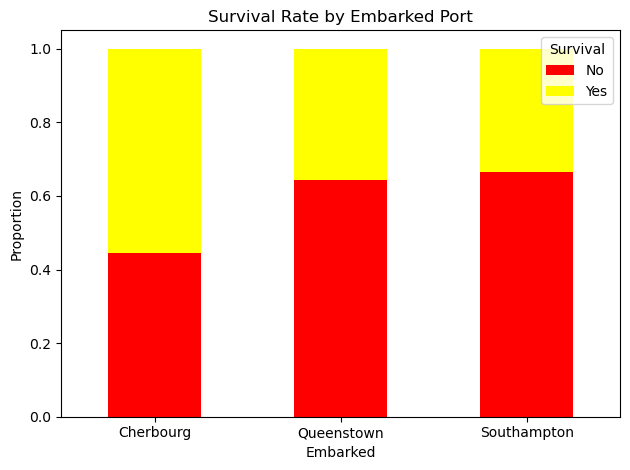

In [84]:
embarked_survival = df.groupby('Embarked')['Survival_Status'].value_counts(normalize=True).unstack()
print(embarked_survival)
plt.figure(figsize=(5,4))
embarked_survival.plot(kind='bar', stacked=True, colormap='autumn')
plt.title("Survival Rate by Embarked Port")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Survival")
plt.tight_layout()
plt.savefig("Survival_by_Embarked.png")
plt.show()

**Passengers boarding at Cherbourg had the highest survival (~56%), while those at Southampton (~33%) and Queenstown (~36%) had lower survival rates, 
suggesting some port-related differences in survival.**

**Summary Insights**

The survival analysis shows strong relationships between survival and several categorical variables:

Gender: Females had much higher survival than males.
    
Passenger Class: First Class passengers were more likely to survive than lower classes.
    
Age: Children had higher survival, while survival decreased with age.

Boat Access: Access to lifeboats was the most decisive factor for survival.

Overall, survival was influenced by a combination of gender, Passenger class, age, and access to lifeboats, 
confirming historical accounts of Titanic evacuation procedures.**

In [87]:
#  Prepare summary text
summary_text = """
Titanic Survival Analysis Summary:

- Gender: Females had a substantially higher survival rate (~73%) compared to males (~19%).
- Passenger Class: First Class passengers had the highest survival (~62%), Third Class the lowest (~26%).
- Age: Children (0–12) survived more (~57%) than adults (~36%). Teens and Middle-Aged adults had moderate survival.
- Body Recovered: Passengers with body recovered (1) did not survive; blanks (0) indicate survivors (~42% survival).
- Boat Access: Lifeboat access greatly increased survival (~98% with access vs ~3% without).
- Embarked Port: Survival varied slightly by port, with Cherbourg passengers (~56%) faring better than Southampton (~33%) and Queenstown (~36%).
- Overall: Survival was strongly influenced by gender, age, class, and lifeboat access.
"""
#  Write the summary to a text file
with open(f"Survival_Summary.txt", "w") as f:
    f.write(summary_text)

print("Summary file created at Survival_Summary.txt'")

Summary file created at Survival_Summary.txt'
